In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv('Final_dataset.csv')
data

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse_mi,Delay
0,Nigeria,EXW,Air,2008-05-02,2008-02-05,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,0.01,India,22.351115,78.667743,9.600036,7.999972,6306,-87
1,Haiti,EXW,Air,2008-02-18,2008-02-18,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,0.44,India,22.351115,78.667743,19.139995,-72.357097,6831,0
2,Guyana,EXW,Air,2008-09-04,2008-04-01,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,0.00,India,22.351115,78.667743,4.841710,-58.641689,6831,-156
3,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,5328,0
4,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,1.39,France,46.603354,1.888334,-28.816624,24.991639,5407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6997,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6998,Rwanda,N/A - From RDC,Air,2012-08-06,2012-06-01,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,11.96,India,22.351115,78.667743,-1.964663,30.064436,3714,-66
6999,Uganda,N/A - From RDC,Truck,2012-06-12,2012-11-20,SCMS from RDC,25,169.00,6.76,0.11,Yes,0.24,India,22.351115,78.667743,1.533355,32.216658,3714,161


In [3]:
def rename_shipment_mode(mode):
    if mode in ['Air', 'Air Charter']:
        return 'Air_All'
    elif mode in ['Truck', 'Ocean']:
        return 'Ground_Sea'
    else:
        return mode 
data['Shipment Mode'] = data['Shipment Mode'].apply(rename_shipment_mode)

print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW       Air_All              2008-05-02   
1         Haiti              EXW       Air_All              2008-02-18   
2        Guyana              EXW       Air_All              2008-09-04   
3  South Africa              DDP    Ground_Sea              2008-04-24   
4  South Africa              DDP    Ground_Sea              2008-04-24   

  Delivered to Client Date                Vendor  Line Item Quantity  \
0               2008-02-05         Orgenics, Ltd                 650   
1               2008-02-18  Trinity Biotech, Plc                   2   
2               2008-04-01         Orgenics, Ltd                 240   
3               2008-04-24    S. BUYS WHOLESALER                   6   
4               2008-04-24    S. BUYS WHOLESALER                 600   

   Line Item Value  Pack Price  Unit Price First Line Designation  \
0             6.50        0.01        0.00           

In [4]:
data['Shipment Mode'] = data['Shipment Mode'].apply(rename_shipment_mode)
data['Shipment Mode Binary'] = data['Shipment Mode'].map({'Air_All': 0, 'Ground_Sea': 1})
data[['Shipment Mode', 'Shipment Mode Binary']].head()

,Shipment Mode,Shipment Mode Binary
0,Air_All,0
1,Air_All,0
2,Air_All,0
3,Ground_Sea,1
4,Ground_Sea,1


In [5]:
specific_columns = data[['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'LineItemInsurance', 'Delay']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(specific_columns)
scaled_data_df = pd.DataFrame(scaled_data, columns=specific_columns.columns)
print(scaled_data_df.head())

   Line Item Quantity  Line Item Value  Pack Price  Unit Price  \
0           -0.444078        -0.435110   -0.543259   -0.241211   
1           -0.460221        -0.434236    3.385274    0.303203   
2           -0.454292        -0.435123   -0.543259   -0.241211   
3           -0.460122        -0.433826    1.364619   -0.143295   
4           -0.445324        -0.432329   -0.502558   -0.237295   

   LineItemInsurance     Delay  
0          -0.457077 -0.927339  
1          -0.456132  0.071231  
2          -0.457099 -1.719309  
3          -0.455671  0.071231  
4          -0.454044  0.071231  


In [6]:
X = scaled_data_df
Y = data['Shipment Mode Binary']
X_train, X_test, y_train, y_test = train_test_split(scaled_data_df, Y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))

Accuracy of logistic regression classifier on test set: 0.66


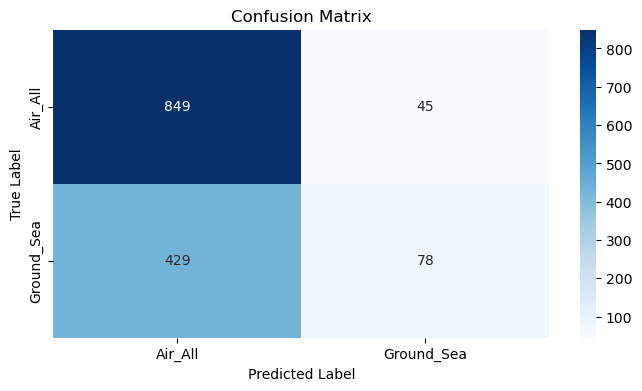

In [9]:


cm = confusion_matrix(y_test, y_pred)
class_labels = ['Air_All', 'Ground_Sea']
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [10]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())

Training set shape: (5600, 6) (5600,)
Testing set shape: (1401, 6) (1401,)

Sample of training data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
6641,-0.458527,-0.431308,-0.064170,-0.205962,-0.452924,-2.304677
3887,0.401576,-0.184465,-0.479946,-0.225545,-0.245507,0.163054
2653,-0.458054,-0.425959,0.360934,0.385452,-0.449737,1.735515
6975,-0.459773,-0.434737,-0.370844,-0.202045,-0.456528,-0.146848
6584,-0.457780,-0.424826,0.360934,0.385452,-0.445848,0.071231



Sample of testing data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
5760,-0.430775,-0.363068,-0.009336,-0.178545,-0.399218,-0.892906
2944,-0.083594,-0.017359,-0.301030,-0.186378,-0.057429,0.071231
2024,-0.410446,-0.409948,-0.433026,-0.190295,-0.433015,-0.020592
263,-0.455289,-0.425476,-0.119852,-0.143295,-0.444178,-1.420885
4421,-0.385833,-0.199384,0.148947,9.354573,-0.258099,0.071231


In [11]:
print("\nSample of training data:")
display(y_train.head())

print("\nSample of testing data:")
display(y_test.head())


Sample of training data:


6641    0
3887    0
2653    0
6975    0
6584    0
Name: Shipment Mode Binary, dtype: int64


Sample of testing data:


5760    0
2944    1
2024    0
263     0
4421    0
Name: Shipment Mode Binary, dtype: int64

In [12]:
train_combined = pd.concat([X_train, y_train], axis=1)
test_combined = pd.concat([X_test, y_test], axis=1)
train_combined.to_csv('train_combined_data.csv', index=False)
test_combined.to_csv('test_combined_data.csv', index=False)
train_combined_path = 'train_combined_data.csv'
test_combined_path = 'test_combined_data.csv'
train_combined = pd.read_csv(train_combined_path)
test_combined = pd.read_csv(test_combined_path)
combined_data = pd.concat([train_combined, test_combined], axis=0)

combined_data_path = 'logisticregression.csv'
combined_data.to_csv(combined_data_path, index=False)

In [13]:
X = scaled_data_df
X = X - X.min()  

In [14]:
Y = data['Shipment Mode Binary']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Multinomial Naive Bayes: {accuracy:.2%}")

Accuracy for Multinomial Naive Bayes: 65.45%


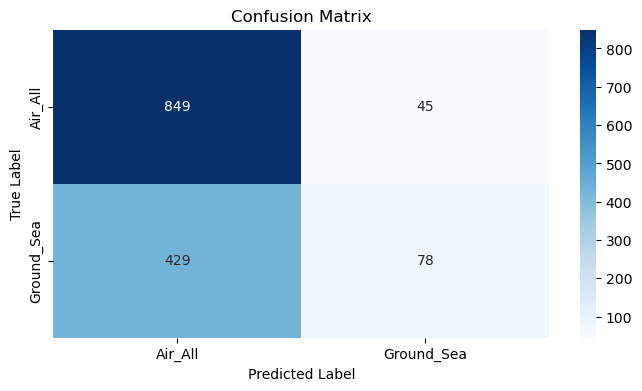

In [16]:


cm = confusion_matrix(y_test, y_pred)
class_labels = ['Air_All', 'Ground_Sea']
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())

Training set shape: (5600, 6) (5600,)
Testing set shape: (1401, 6) (1401,)

Sample of training data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
6641,0.001719,0.003823,0.479372,0.035250,0.004175,1.847929
3887,0.861823,0.250666,0.063596,0.015667,0.211591,4.315660
2653,0.002192,0.009171,0.904476,0.626663,0.007361,5.888121
6975,0.000473,0.000394,0.172698,0.039166,0.000571,4.005758
6584,0.002466,0.010305,0.904476,0.626663,0.011251,4.223837



Sample of testing data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
5760,0.029471,0.072063,0.534206,0.062666,0.057881,3.259700
2944,0.376652,0.417771,0.242513,0.054833,0.399670,4.223837
2024,0.049800,0.025183,0.110516,0.050916,0.024084,4.132014
263,0.004958,0.009655,0.423690,0.097916,0.012921,2.731721
4421,0.074414,0.235747,0.692489,9.595785,0.199000,4.223837


In [18]:
print("\nSample of training data:")
display(y_train.head())

print("\nSample of testing data:")
display(y_test.head())


Sample of training data:


6641    0
3887    0
2653    0
6975    0
6584    0
Name: Shipment Mode Binary, dtype: int64


Sample of testing data:


5760    0
2944    1
2024    0
263     0
4421    0
Name: Shipment Mode Binary, dtype: int64

In [19]:
combined_data = pd.concat([X, Y], axis=1)
combined_data.to_csv('logisticmultinaive.csv', index=False)
